In [ ]:
"""
Objective:
• Use k-means clustering for image segmentation and to identify the dominant 
color in the image.
"""

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans

In [6]:
"""
Open and display the image “dog.jpeg”. Convert the image into a numpy array,
so that it can be used in further processing.
[Hint: Use the PIL module from python]
"""
IMG_PATH = r'D:\CourseWork\data-science-python-certification-course\Assignments\10 Unsupervised Learning\Case Study II\resources\dogs.jpeg'
img = Image.open(IMG_PATH)
np_array = np.array(img)
np_array.shape # Height, Width, Color Matrix

(185, 272, 3)

In [5]:
print(f"Image Dimensions: {img.width} x {img.height}")

Image Dimensions: 272 x 185


In [9]:
flat = np_array.ravel()
new_array = flat.reshape(np_array.shape[0] * np_array.shape[1], np_array.shape[2])

In [14]:
km = KMeans(n_clusters=3)
km.fit(new_array)
print("Cluster Centroids:\n", km.cluster_centers_)
print("Cluster Counts:\n", dict(zip(*np.unique(km.labels_, return_counts=True))))

c:\Users\Vishv\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centroids:
 [[210.60654796 174.78715024 143.65766801]
 [251.4718835  247.65766401 243.12239242]
 [ 29.50970635  21.57953738  20.47312298]]
Cluster Counts:
 {0: 12215, 1: 19814, 2: 18291}


In [19]:
df = pd.DataFrame(new_array, columns=["C1", "C2", "C3"])
df["cluster"] = km.labels_
print(df.head(5))

    C1   C2   C3  cluster
0  240  240  240        1
1  255  255  255        1
2  255  255  255        1
3  251  251  251        1
4  255  255  255        1


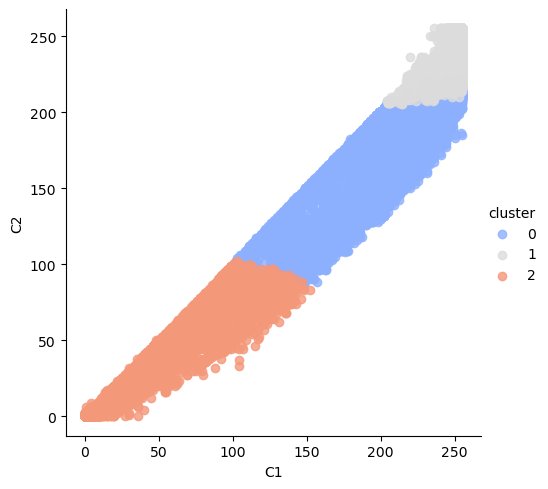

In [21]:
sns.lmplot(df, x='C1', y='C2', hue="cluster", palette='coolwarm', aspect=1, fit_reg=False)

In [24]:
xc = km.cluster_centers_[km.labels_]
xc = np.clip(xc.astype('uint8'), 0, 255)
xc = xc.reshape(np_array.shape[0], np_array.shape[1], np_array.shape[2])

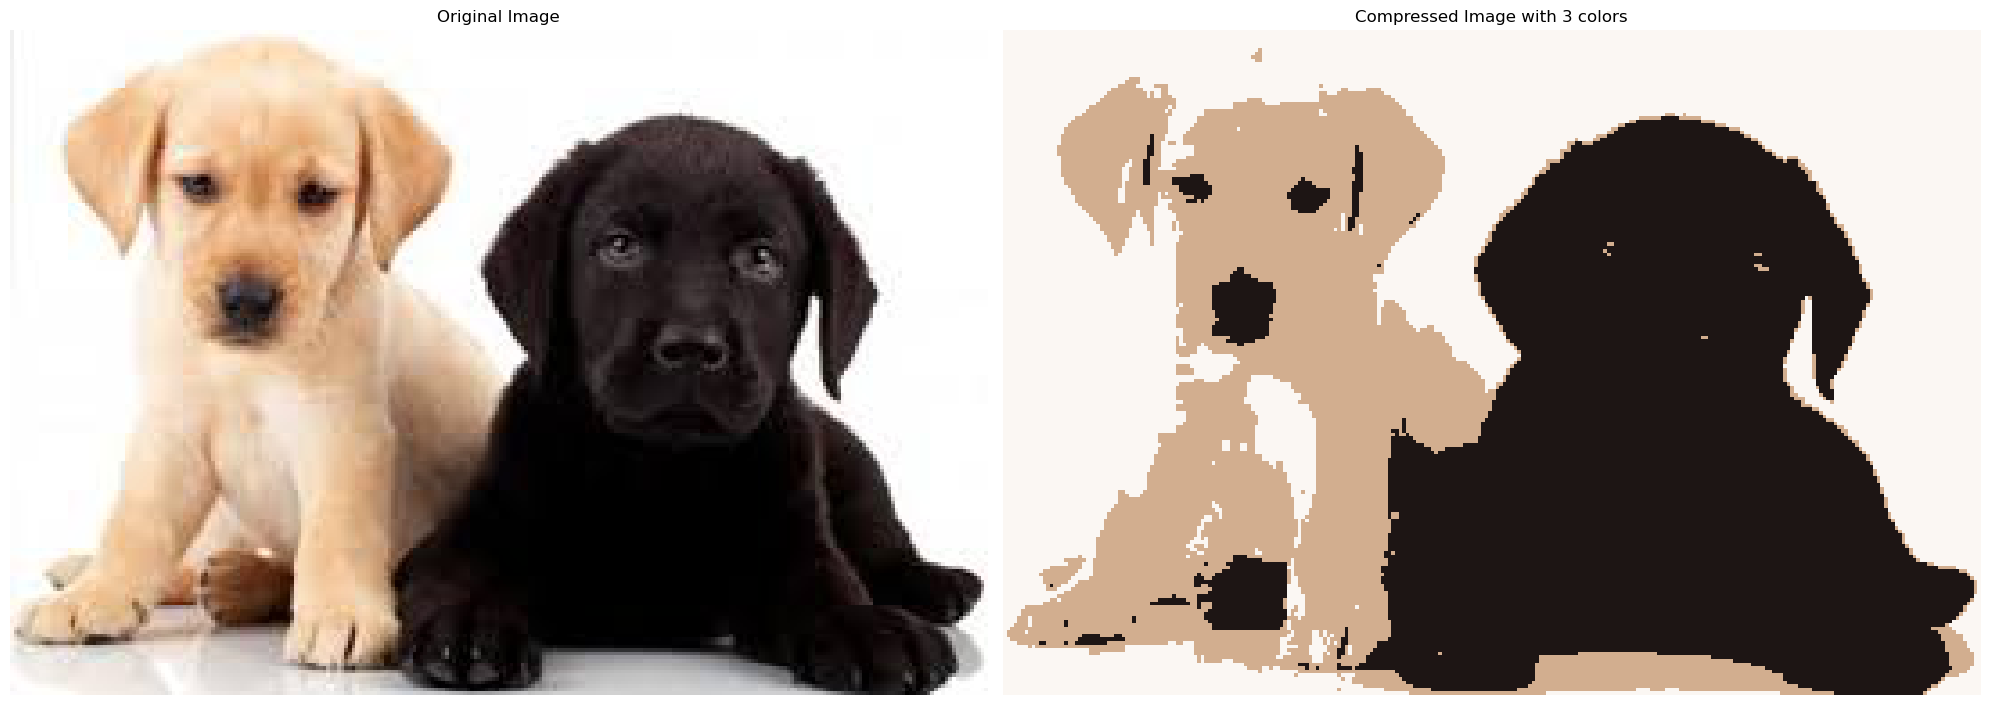

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].imshow(img)
ax[0].set_title('Original Image')

ax[1].imshow(xc)
ax[1].set_title('Compressed Image with 3 colors')

for ax in fig.axes:
    ax.axis('off')

plt.tight_layout()

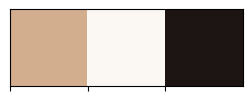

In [28]:
to_hex = lambda rgb: '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))

centroid_colors = km.cluster_centers_.astype(int)
colors = [to_hex(rgb) for rgb in centroid_colors]

sns.palplot(colors)
plt.show() # Will show the dominant colors